In [ ]:
import os
import numpy as np
from typing import Union
import cv2
import matplotlib.pyplot as plt
import glob as glob
import json
import pandas as pd
from PIL import Image
import keras

Using TensorFlow backend.


In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input, SeparableConv2D,Concatenate,Conv2DTranspose, Add, UpSampling2D, Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D,MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, MaxPool2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img


from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical 

from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.regularizers import l2
# from sklearn.utils import class_weight


from google.colab import drive
drive.mount('/content/drive')

os.chdir('drive/MyDrive/xray_lung')
os.getcwd()

In [ ]:
image_path = 'Montgomery/CXR_png'
left_seg_path = 'Montgomery/ManualMask/leftMask'
right_seg_path = 'Montgomery/ManualMask/rightMask'

In [ ]:
# import shutil
# temp = glob.glob('Montgomery/CXR_png/*png')
# temp.sort()
# temp = temp[:int(len(temp)*0.8)]
# for file in temp:
#   print(os.path.basename(file))
#   dest = 'Montgomery/CXR_png/train/img'
#   shutil.copyfile(file, f'{dest}/{os.path.basename(file)}')

In [ ]:
img_size = (512,512)
classes = ['lung']
num_classes = len(classes)
batch_size = 4

In [ ]:
# if not os.path.exists('Mongomery/Masks'):
#   os.makedirs('Montgomery/Masks')

In [ ]:
# right_paths = glob.glob(f'{right_seg_path}/*png')
# left_paths = glob.glob(f'{left_seg_path}/*png')
# for index,file in enumerate(right_paths):
#   print(os.path.basename(file))
#   left = load_img(left_paths[index], target_size=img_size, color_mode="grayscale")
#   right = load_img(right_paths[index], target_size=img_size, color_mode="grayscale")

#   img = Image.fromarray((np.array(left) + np.array(right))/255.).convert('RGB')
  
#   img.save(f'Montgomery/Masks/{os.path.basename(file)}', "PNG")
  # plt.imshow(img)
  # plt.show()


In [ ]:
# class ImageDataGen(Sequence):
#     """Helper to iterate over the data (as Numpy arrays)."""

#     def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
#         self.batch_size = batch_size
#         self.img_size = img_size
#         self.input_img_paths = input_img_paths
#         self.target_img_paths = target_img_paths

#     def __len__(self):
#         return len(self.target_img_paths) // self.batch_size

#     def __getitem__(self, idx):
#         """Returns tuple (input, target) correspond to batch #idx."""
#         i = idx * self.batch_size
#         batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
#         batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
#         x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
#         for j, path in enumerate(batch_input_img_paths):
#             img = load_img(path, target_size=self.img_size)
#             img = img.resize(img_size, Image.ANTIALIAS)
#             x[j] = img
#         y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
#         for j, path in enumerate(batch_target_img_paths):
#             img = load_img(path, target_size=self.img_size, color_mode="grayscale")
#             img = img.resize(img_size, Image.ANTIALIAS)
#             y[j] = np.expand_dims(img, 2)
#             # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
#             # y[j] -= 1
#         return x, y

In [ ]:
os.getcwd()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/anhnq47-0gpu/code/Users/anhnq47/EnvironmentalEstimation/Road/Road Semantic Segmentation'

(4020, 4892)


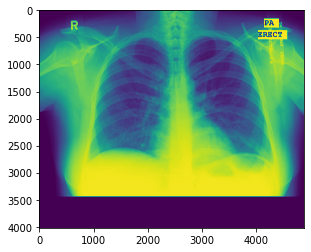

In [ ]:
index = 0
train_img_path = glob.glob('Montgomery/CXR_png/train/img/*png')
img = cv2.imread(train_img_path[index], 0)
# print(np.unique(img, return_counts = True))
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
# # train_img_path = glob.glob('Montgomery/CXR_png/train/img/*png')
# # train_mask_path = glob.glob('Montgomery/Masks/train/img/*png')
# # val_img_path = glob.glob('Montgomery/CXR_png/valid/img/*png')
# # val_mask_path = glob.glob('Montgomery/Masks/valid/img/*png')
# # val_mask_path.sort()
# # val_img_path.sort()
# # train_img_path.sort()
# # train_mask_path.sort()

# image_paths = glob.glob('Montgomery/CXR_png/*.png')
# target_paths = glob.glob('Montgomery/Masks/*.png')
# image_paths.sort()
# target_paths.sort()
# train_ratio = 0.8
# train_input_img_paths = image_paths[:int(len(image_paths) * 0.8)]
# val_input_img_paths = [x for x in image_paths if x not in train_input_img_paths]
# train_target_img_paths = target_paths[:int(len(target_paths) * 0.8)]
# val_target_img_paths = [x for x in target_paths if x not in train_target_img_paths]

# print(len(train_target_img_paths))
# print(len(val_target_img_paths))

# class DataGenerator(keras.utils.Sequence):
    
#     def __init__(self,train_im_path = train_input_img_paths,train_mask_path = train_target_img_paths,
#                  augmentations = None,img_size = img_size[0],batch_size = 4,nchannels = 3,shuffle = True):
        
#         #self.train_im_paths = list(filepath)
#         self.train_im_path = train_im_path
#         # print(type(self.train_im_path))
#         self.train_mask_path = train_mask_path
#         self.img_size = img_size
#         self.batch_size = batch_size
#         self.nchannels = nchannels
#         self.shuffle = shuffle
#         self.augmentations = augmentations
#         self.on_epoch_end()
    
#     def __len__(self):
        
#         return int(np.ceil(len(self.train_im_path)/ self.batch_size))
    
#     def __getitem__(self,index):
        
#         indexes = self.indexes[index * self.batch_size : min((index + 1) * self.batch_size, len(self.train_im_path))]
#         list_im_ids = [self.train_im_path[i] for i in indexes]
#         list_mask_ids = [self.train_mask_path[i] for i in indexes]
#         X,y = self.data_generation(list_im_ids,list_mask_ids)
        
#         return X,to_categorical(y, num_classes = 2)
    
#     def on_epoch_end(self):
#         # print(type(self.train_im_path))
#         self.indexes = np.arange(len(self.train_im_path))
#         if(self.shuffle):
#             np.random.shuffle(self.indexes)
    
#     def data_generation(self,list_im_ids,list_mask_ids):
#         X = np.empty((len(list_im_ids),self.img_size,self.img_size,self.nchannels))
#         y = np.empty((len(list_mask_ids),self.img_size,self.img_size,1))
#         for i,(img_path, mask_path) in enumerate(zip(list_im_ids,list_mask_ids)):
#             mask = np.array(Image.open(mask_path).convert('L'))
#             # mask = cv2.imread(mask_path, 0)
#             #plt.imshow(mask)
#             img = np.array(Image.open(img_path))/255
#             # img = cv2.imread(img_path)
#             #img = np.true_divide(img,255.)
#            # plt.imshow(img,cmap = 'bone')
#             if(len(img.shape) == 2):
#                 img = np.repeat(img[...,np.newaxis],3,2)
            
#            # plt.imshow(img,cmap = 'bone')
#             X[i,] = cv2.resize(img,(self.img_size,self.img_size))
#             y[i,] = cv2.resize(mask,(self.img_size,self.img_size))[...,np.newaxis]
#             # print(X.shape)
#             # print(y.shape)
#             # y[y > 0] = 255
#         return np.float32(X),np.float32(y)



# train_gen = DataGenerator()
# val_gen = DataGenerator(train_im_path = val_input_img_paths, train_mask_path = val_target_img_paths)

110
28


In [ ]:
len(val_gen)

7

In [ ]:
# image_paths = glob.glob('Montgomery/CXR_png/*.png')
# target_paths = glob.glob('Montgomery/Masks/*.png')
# image_paths.sort()
# target_paths.sort()
# train_ratio = 0.8
# train_input_img_paths = image_paths[:int(len(image_paths) * 0.8)]
# val_input_img_paths = [x for x in image_paths if x not in train_input_img_paths]
# train_target_img_paths = target_paths[:int(len(target_paths) * 0.8)]
# val_target_img_paths = [x for x in target_paths if x not in train_target_img_paths]

# print(len(train_target_img_paths))
# print(len(val_target_img_paths))

In [ ]:

# train_gen = ImageDataGen(
#     batch_size, img_size, train_input_img_paths, train_target_img_paths
# )
# val_gen = ImageDataGen(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [ ]:
# we create two instances with the same arguments
data_gen_args = dict(zoom_range=[0.8, 1.2],
                     horizontal_flip = True,
                     rotation_range = 10,
                     featurewise_center=False,
                      featurewise_std_normalization=False,
                     )

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_generator = image_datagen.flow_from_directory(
  'Montgomery/CXR_png/train',
  class_mode=None,
  batch_size = batch_size,
  target_size=img_size,
  seed=seed)
mask_generator = mask_datagen.flow_from_directory(
  'Montgomery/Masks/train',
  class_mode=None,
  batch_size = batch_size,
  color_mode = 'grayscale',
  target_size=img_size,
  seed=seed)
# combine generators into one which yields image and masks
train_gen = zip(image_generator, mask_generator)

Found 110 images belonging to 1 classes.
Found 110 images belonging to 1 classes.


In [ ]:
valid_image_datagen = ImageDataGenerator()
valid_mask_datagen = ImageDataGenerator()
valid_image_generator = valid_image_datagen.flow_from_directory(
    'Montgomery/CXR_png/valid',
    class_mode=None,
    target_size=img_size,
    batch_size = batch_size,
    seed=seed)
valid_mask_generator = valid_mask_datagen.flow_from_directory(
    'Montgomery/Masks/valid',
    class_mode=None,
    batch_size = batch_size,
    target_size=img_size,
    color_mode = 'grayscale',
    seed=seed)
# combine generators into one which yields image and masks
val_gen = zip(valid_image_generator, valid_mask_generator)

Found 28 images belonging to 1 classes.
Found 28 images belonging to 1 classes.


In [ ]:
from image_segmentation.keras_segmentation.models.unet import unet_mini

model = unet_mini(n_classes=2,  input_height=img_size[0], input_width=img_size[1]  )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
# # new_layer = model.layers[-1]
# # required_output = model.layers[-4].output
# top_layer = UpSampling2D()(required_output)
# top_layer = Conv2D(2, (1, 1),  activation="softmax", data_format='channels_last')(top_layer)
# # print(new_layer)
# # print(new_model)


# new_model = Model(model.input, top_layer)
# new_model.summary()

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# values = compute_class_weight('balanced',
#                                                  np.unique(np.argmax(target_train, axis = -1).tolist()),
#                                                  np.ravel(np.argmax(target_train, axis = -1)).tolist())

# # class_weight = dict(zip([x for x in range(len(classes))], values))
# sample_weight = values
# sample_weight 

In [ ]:
# import tensorflow.keras as K
# import tensorflow as tf
# def weighted_categorical_crossentropy(weights = class_weight):
#     # weights = [0.9,0.05,0.04,0.01]
#     def wcce(y_true, y_pred):
#         Kweights = K.initializers.constant(weights)
#         if not tf.is_tensor(y_pred): y_pred =  K.initializers.constant(y_pred)
#         y_true = tf.cast(y_true, y_pred.dtype)
#         return K.losses.categorical_crossentropy(y_true, y_pred) * K.backend.sum(y_true * Kweights, axis=-1)
#     return wcce

In [ ]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
# # callback = EarlyStopping(monitor='val_categorical_accuracy', mode = 'max', patience=5)
# checkpoint_folderpath = f'weights/{model.model_name}_first_temp'
# if not os.path.exists(checkpoint_folderpath):
#     os.makedirs(checkpoint_folderpath) 

# checkpoint_filepath = checkpoint_folderpath + "/{epoch:02d}-{val_categorical_accuracy:.2f}.h5"
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=f'{checkpoint_filepath}',
#     save_weights_only=True,
#     monitor='val_categorical_accuracy',
#     mode='max',
#     save_best_only=True)

# keras_callbacks   = [
#       EarlyStopping(monitor='val_categorical_accuracy', patience=3, mode='max', min_delta = 0.01),
#       model_checkpoint_callback
# ]
# #dice_coef_loss
# # loss = weighted_categorical_crossentropy(class_weight)
# opt = Adam(learning_rate=0.0001)
# model.compile(
#     optimizer=opt, loss='categorical_crossentropy', metrics=[dice_coef, 'categorical_accuracy'], loss_weights=None,
#     weighted_metrics=None, run_eagerly=None)
# history = model.fit(
#     train_gen,
#     # batch_size = batch_size,
#     steps_per_epoch=27,
#     epochs=25,
# #     class_weight = class_weight,
# #     sample_weight=sample_weight,
#     validation_data = val_gen,
#     validation_steps = 7,
#     verbose = 1,
#     callbacks = keras_callbacks,)

Epoch 1/25
27/27 [==============================] - 104s 4s/step - loss: 0.6403 - dice_coef: 0.8203 - categorical_accuracy: 0.6804 - val_loss: 0.5776 - val_dice_coef: 0.8454 - val_categorical_accuracy: 0.7473
Epoch 2/25
27/27 [==============================] - 98s 4s/step - loss: 0.5505 - dice_coef: 0.8527 - categorical_accuracy: 0.7374 - val_loss: 0.5391 - val_dice_coef: 0.8604 - val_categorical_accuracy: 0.7473
Epoch 3/25
27/27 [==============================] - 98s 4s/step - loss: 0.4668 - dice_coef: 0.8791 - categorical_accuracy: 0.7396 - val_loss: 0.4238 - val_dice_coef: 0.8892 - val_categorical_accuracy: 0.7473
Epoch 4/25
27/27 [==============================] - 98s 4s/step - loss: 0.3723 - dice_coef: 0.9020 - categorical_accuracy: 0.7557 - val_loss: 0.4354 - val_dice_coef: 0.8841 - val_categorical_accuracy: 0.7473


In [ ]:
# callback = EarlyStopping(monitor='val_categorical_accuracy', mode = 'max', patience=5)
checkpoint_folderpath = f'weights/{model.model_name}_first_temp'
if not os.path.exists(checkpoint_folderpath):
    os.makedirs(checkpoint_folderpath) 

checkpoint_filepath = checkpoint_folderpath + "/{epoch:02d}-{val_binary_accuracy:.2f}.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=f'{checkpoint_filepath}',
    save_weights_only=True,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

keras_callbacks   = [
      EarlyStopping(monitor='val_binary_accuracy', patience=7, mode='max', min_delta = 0.01),
      model_checkpoint_callback
]
# loss = weighted_categorical_crossentropy(class_weight)
opt = Adam(learning_rate=0.0001)
model.compile(
    optimizer=opt, loss=dice_coef_loss, metrics=[dice_coef, 'binary_accuracy'], loss_weights=None,
    weighted_metrics=None, run_eagerly=None)
history = model.fit(
    train_gen,
    # batch_size = batch_size,
    steps_per_epoch=27,
    epochs=25,
#     class_weight = class_weight,
#     sample_weight=sample_weight,
    validation_data = val_gen,
    validation_steps = 7,
    verbose = 1,
    callbacks = keras_callbacks,)

Epoch 1/25
27/27 [==============================] - 127s 5s/step - loss: 0.3452 - dice_coef: 0.6548 - binary_accuracy: 0.4961 - val_loss: 0.2204 - val_dice_coef: 0.7796 - val_binary_accuracy: 0.5000
Epoch 2/25
27/27 [==============================] - 69s 3s/step - loss: 0.2574 - dice_coef: 0.7426 - binary_accuracy: 0.4962 - val_loss: 0.1991 - val_dice_coef: 0.8009 - val_binary_accuracy: 0.5000
Epoch 3/25
27/27 [==============================] - 69s 3s/step - loss: 0.2070 - dice_coef: 0.7930 - binary_accuracy: 0.4959 - val_loss: 0.1976 - val_dice_coef: 0.8024 - val_binary_accuracy: 0.5000
Epoch 4/25
27/27 [==============================] - 69s 3s/step - loss: 0.1995 - dice_coef: 0.8005 - binary_accuracy: 0.4960 - val_loss: 0.2012 - val_dice_coef: 0.7988 - val_binary_accuracy: 0.5000
Epoch 5/25
27/27 [==============================] - 69s 3s/step - loss: 0.1877 - dice_coef: 0.8123 - binary_accuracy: 0.4959 - val_loss: 0.1994 - val_dice_coef: 0.8006 - val_binary_accuracy: 0.5000
Epoch 6/2

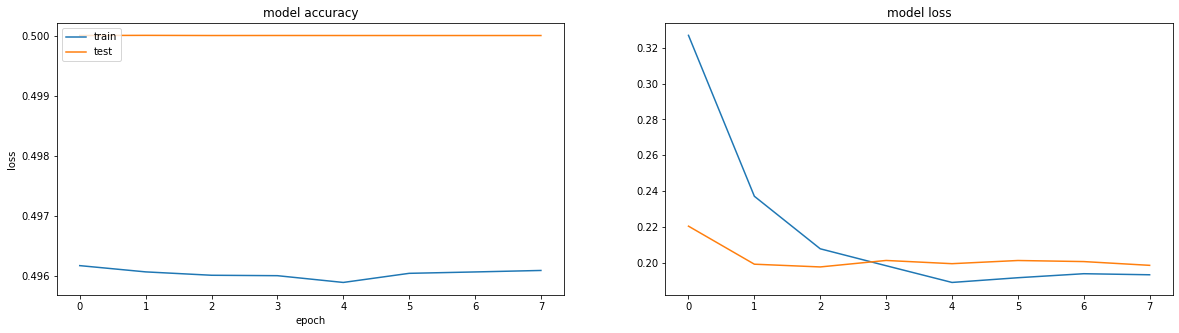

In [ ]:
# summarize history for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
ax1.plot(history.history['binary_accuracy'])
ax1.plot(history.history['val_binary_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
weight_files = glob.glob(f'{checkpoint_folderpath}/*h5')
print(weight_files[-1])
model.load_weights(weight_files[-1])

#Wiping remaining weight files
for file in weight_files[:-1]:
    os.remove(file)

IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    #cm output from sklearn.confusion_matrix
    fig, ax = plt.subplots(figsize = (10,10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.round(cm[i, j], 2),
                          ha="center", va="center", color="k")
    plt.title(title)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
def evaluate(y_truth, y_pred, labels): 
    print('Classification Report')
    print(classification_report(y_truth, y_pred,labels = [x for x in range(len(labels))], target_names=labels))
    print('Confusion Matrix')
    plot_confusion_matrix(confusion_matrix(y_truth, y_pred, normalize = 'true'), labels = labels)

In [ ]:
# test_gen = test_generator(test_files, target_size=(512,512))
results = model.predict(val_gen,5,  verbose=1)

7/7 [==============================] - 20s 3s/step


In [ ]:
results.shape

(28, 512, 512, 2)

In [ ]:
dir(val_gen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'augmentations',
 'batch_size',
 'data_generation',
 'img_size',
 'indexes',
 'nchannels',
 'on_epoch_end',
 'shuffle',
 'train_im_path',
 'train_mask_path']

In [ ]:
# from evaluate import evaluate
#Ground truth
y_truth = val_gen.__class__
print(y_truth.shape)
print('True Valid',np.unique(y_truth, return_counts = True))

#Predict
# predict = model.predict_generator(test_generator,steps = nb_samples)
# y_pred = model.predict(data_valid)
y_pred = np.ravel(np.argmax(results, axis = -1))
print(y_pred.shape)
print('Pred Valid', np.unique(y_pred, return_counts = True))


AttributeError: ignored

In [ ]:
#Evaluate
evaluate(y_truth, y_pred, classes)